<a href="https://colab.research.google.com/github/camaradaneto/python_para_investimentos/blob/master/Momentum_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt

A estratégia se baseia em verificar a media móvel do movimento do preço e o movimento do volume de negociações.  
* Preço baixo + volume alto = momento de compra  
* Preço alto + volume baixo = momento de venda

In [21]:
papel = input("Qual o papel a ser procurado: ")

Qual o papel a ser procurado: BKNG


In [69]:
janela = input("Qual a janela da media móvel: ")

Qual a janela da media móvel: 2


Cada papel possui volatilidade e comportamento diferente, ptt é interessante testar um prazo diferente de 150 dias com outros papeis para buscar o melhor rendimento.  
Papeis mais estáveis (large caps) precisam de período e media móvel maiores que papéis mais voláteis. 

In [70]:
start = (date.today()-timedelta(150))
end = date.today()
df = web.DataReader(papel, 'yahoo', start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-28,2152.260010,2124.459961,2129.449951,2137.919922,251000,2137.919922
2020-12-29,2200.000000,2153.959961,2165.979980,2185.399902,341900,2185.399902
2020-12-30,2214.010010,2174.969971,2200.000000,2205.260010,229700,2205.260010
2020-12-31,2227.969971,2185.000000,2198.070068,2227.270020,176600,2227.270020
2021-01-04,2257.189941,2121.209961,2250.000000,2164.080078,334000,2164.080078
...,...,...,...,...,...,...
2021-05-20,2309.760010,2260.909912,2279.840088,2306.050049,311900,2306.050049
2021-05-21,2336.300049,2268.340088,2324.570068,2293.379883,263200,2293.379883
2021-05-24,2356.149902,2300.199951,2301.719971,2348.479980,332500,2348.479980


A media móvel aqui será de 30 dias, mas também deve ser testado prazos diferentes de acordo com a estratégia e o papel negociado.

In [71]:
# criando a variável para medir a media movel
df['mm_preco'] = df['Adj Close'].rolling(window=int(janela)).mean()
df['mm_volume'] = df['Volume'].rolling(window=int(janela)).mean()

As primeiras linhas das novas colunas aparecem NAN pq a media móvel que escolhemos precisa dos primeiros registros para ser calculada

In [72]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,mm_preco,mm_volume
Date,,,,,,,,
2020-12-28,2152.260010,2124.459961,2129.449951,2137.919922,251000,2137.919922,NaN,NaN
2020-12-29,2200.000000,2153.959961,2165.979980,2185.399902,341900,2185.399902,2161.659912,296450.0
2020-12-30,2214.010010,2174.969971,2200.000000,2205.260010,229700,2205.260010,2195.329956,285800.0
2020-12-31,2227.969971,2185.000000,2198.070068,2227.270020,176600,2227.270020,2216.265015,203150.0
2021-01-04,2257.189941,2121.209961,2250.000000,2164.080078,334000,2164.080078,2195.675049,255300.0


In [73]:
df = df.dropna()
df

,High,Low,Open,Close,Volume,Adj Close,mm_preco,mm_volume
Date,,,,,,,,
2020-12-29,2200.000000,2153.959961,2165.979980,2185.399902,341900,2185.399902,2161.659912,296450.0
2020-12-30,2214.010010,2174.969971,2200.000000,2205.260010,229700,2205.260010,2195.329956,285800.0
2020-12-31,2227.969971,2185.000000,2198.070068,2227.270020,176600,2227.270020,2216.265015,203150.0
2021-01-04,2257.189941,2121.209961,2250.000000,2164.080078,334000,2164.080078,2195.675049,255300.0
2021-01-05,2225.939941,2154.560059,2164.000000,2188.070068,348200,2188.070068,2176.075073,341100.0
...,...,...,...,...,...,...,...,...
2021-05-20,2309.760010,2260.909912,2279.840088,2306.050049,311900,2306.050049,2288.030029,358850.0
2021-05-21,2336.300049,2268.340088,2324.570068,2293.379883,263200,2293.379883,2299.714966,287550.0
2021-05-24,2356.149902,2300.199951,2301.719971,2348.479980,332500,2348.479980,2320.929932,297850.0


É interessante plotar para visualizarmos o comportamento da ação ao longo do tempo. Isso não é essencial, mas pode nos dar insights para configurar os prazos e estratégia

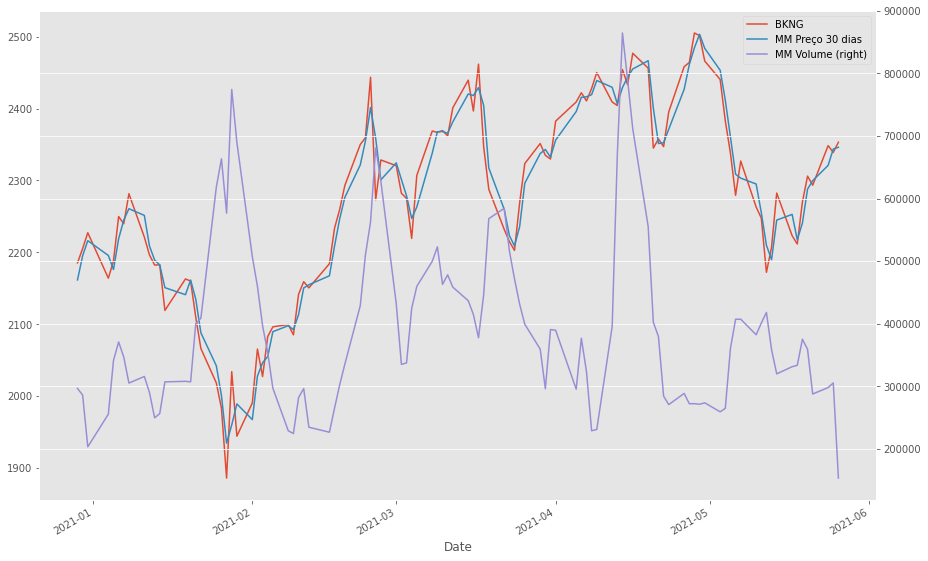

In [74]:
# plota a mm
close_price = df['Adj Close']
mmp_plot = df['mm_preco']
mmv_plot = df['mm_volume']

# ajustando o tamanho do plot
plt.rc('figure', figsize=(15,10))

# ajustando o estilo
plt.style.use('ggplot')

close_price.plot(label=papel, legend=True)
mmp_plot.plot(label='MM Preço 30 dias', legend=True)
mmv_plot.plot(secondary_y=True, label='MM Volume', legend=True);


Criando indicadores se o preço está abaixo da media e volume acima.  
* Preço baixo + volume alto = compra
* Preço alto + volume baixo = venda

In [75]:
df['preco_abaixo'] = df['mm_preco'].gt(df['Adj Close']) # gt '>' retorna booleano (great than)
df['volume_acima'] = df['mm_volume'].gt(df['Volume'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
df

,High,Low,Open,Close,Volume,Adj Close,mm_preco,mm_volume,preco_abaixo,volume_acima
Date,,,,,,,,,,
2020-12-29,2200.000000,2153.959961,2165.979980,2185.399902,341900,2185.399902,2161.659912,296450.0,False,False
2020-12-30,2214.010010,2174.969971,2200.000000,2205.260010,229700,2205.260010,2195.329956,285800.0,False,True
2020-12-31,2227.969971,2185.000000,2198.070068,2227.270020,176600,2227.270020,2216.265015,203150.0,False,True
2021-01-04,2257.189941,2121.209961,2250.000000,2164.080078,334000,2164.080078,2195.675049,255300.0,True,False
2021-01-05,2225.939941,2154.560059,2164.000000,2188.070068,348200,2188.070068,2176.075073,341100.0,False,False
...,...,...,...,...,...,...,...,...,...,...
2021-05-20,2309.760010,2260.909912,2279.840088,2306.050049,311900,2306.050049,2288.030029,358850.0,False,True
2021-05-21,2336.300049,2268.340088,2324.570068,2293.379883,263200,2293.379883,2299.714966,287550.0,True,True
2021-05-24,2356.149902,2300.199951,2301.719971,2348.479980,332500,2348.479980,2320.929932,297850.0,False,False


Testando a estratégia.  
Antes de operar a estratégia é necessário saber se ela dará retorno. Para isso, calcularemos o retorno de acordo com os indicadores de compra e venda.

In [77]:
z = 1 # variável para controlar compra e venda, para que não as repita antes de alternar
pl = 0.00 # hist. de perda/lucro
preco_inicial = (df['Adj Close'].head(1))
preco_inicial = float(preco_inicial)
print('Preço Inicial: ', preco_inicial)

preco_final = (df['Adj Close'].tail(1))
preco_final = float(preco_final)
print('Preço final: ', preco_final)

retorno = (pl / preco_inicial)
retorno_perc = "{:.2%}".format(retorno)

Preço Inicial:  2185.39990234375
Preço final:  2353.219970703125


Iterando sobre o df para testar com dados passados se essa estratégia funcionará

In [78]:
for index, row in df.iterrows():
  if row['volume_acima'] == 1:
    if row['preco_abaixo'] == 1:
      if z == 1:
        print(index, row['Adj Close'], ' - Compra')
        close_adj = row['Adj Close']
        pl = pl - close_adj
        z = z-1

  else:
    if row['volume_acima'] == 0:
      if row['preco_abaixo'] == 0:
        if z == 0:
          print(index, row['Adj Close'], ' - Venda')
          close_adj = row['Adj Close']
          pl = pl + close_adj
          retorno = (pl / preco_inicial)
          retorno_perc = "{:.2%}".format(retorno)
          print('Total Perda/Ganho: ', round(pl, 2))
          print('Total Retorno % ', retorno_perc, "\n")
          z = z+1

retorno_obtido = (preco_final - preco_inicial)
retorno_obtido_perc = "{:.2%}".format((preco_final - preco_inicial) / preco_inicial)

print("O retorno obtido para o período foi: ", retorno_obtido, "  ", retorno_perc)

2021-01-07 00:00:00 2239.85009765625  - Compra
2021-01-08 00:00:00 2281.5400390625  - Venda
Total Perda/Ganho:  41.69
Total Retorno %  1.91% 

2021-01-12 00:00:00 2196.340087890625  - Compra
2021-01-14 00:00:00 2182.590087890625  - Venda
Total Perda/Ganho:  27.94
Total Retorno %  1.28% 

2021-01-22 00:00:00 2066.239990234375  - Compra
2021-01-28 00:00:00 2034.0999755859375  - Venda
Total Perda/Ganho:  -4.2
Total Retorno %  -0.19% 

2021-01-29 00:00:00 1944.3299560546875  - Compra
2021-02-04 00:00:00 2082.93994140625  - Venda
Total Perda/Ganho:  134.41
Total Retorno %  6.15% 

2021-02-12 00:00:00 2150.580078125  - Compra
2021-02-16 00:00:00 2184.159912109375  - Venda
Total Perda/Ganho:  167.99
Total Retorno %  7.69% 

2021-03-01 00:00:00 2320.5  - Compra
2021-03-08 00:00:00 2368.739990234375  - Venda
Total Perda/Ganho:  216.23
Total Retorno %  9.89% 

2021-03-09 00:00:00 2366.7900390625  - Compra
2021-03-15 00:00:00 2439.5  - Venda
Total Perda/Ganho:  288.94
Total Retorno %  13.22% 

20